In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing


Data Exploration

In [2]:
cells_data = pd.read_csv("D:\#DATA Science\Machine Learning\cell_samples.csv")
cells_data.tail()

,ID,Clump,UnifSize,UnifShape,MargAdh,SingEpiSize,BareNuc,BlandChrom,NormNucl,Mit,Class
694,776715,3,1,1,1,3,2,1,1,1,2
695,841769,2,1,1,1,2,1,1,1,1,2
696,888820,5,10,10,3,7,3,8,10,2,4
697,897471,4,8,6,4,3,4,10,6,1,4
698,897471,4,8,8,5,4,5,10,4,1,4


In [3]:
cells_data.shape

(699, 11)

Data Visulization and Behavior

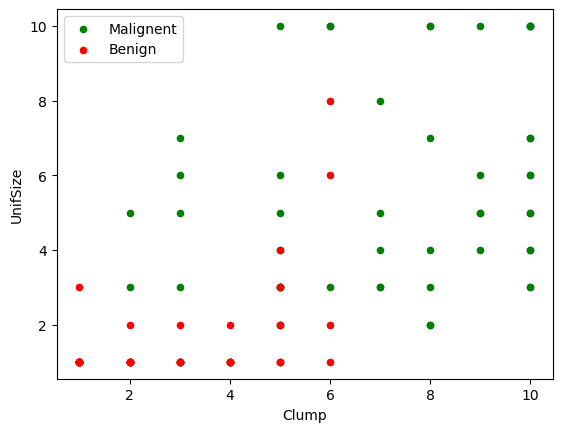

In [4]:
myplot = cells_data[cells_data["Class"] == 4][0:50].plot(kind="scatter", x = "Clump", y = "UnifSize", color = "green", label = 'Malignent');
cells_data[cells_data["Class"] == 2][0:50].plot(kind="scatter", x = "Clump", y = "UnifSize", color = "red", label = "Benign", ax = myplot);
plt.show()

Data Preprocessing

In [5]:
cells_data.dtypes

ID              int64
Clump           int64
UnifSize        int64
UnifShape       int64
MargAdh         int64
SingEpiSize     int64
BareNuc        object
BlandChrom      int64
NormNucl        int64
Mit             int64
Class           int64
dtype: object

In [6]:
cells_data["BareNuc"].isnull().sum()

0

In [7]:
cells_data = cells_data[pd.to_numeric(cells_data["BareNuc"], errors="coerce").notnull()]
cells_data["BareNuc"] = cells_data["BareNuc"].astype('int64')
cells_data.dtypes


ID             int64
Clump          int64
UnifSize       int64
UnifShape      int64
MargAdh        int64
SingEpiSize    int64
BareNuc        int64
BlandChrom     int64
NormNucl       int64
Mit            int64
Class          int64
dtype: object

In [8]:
cells_data["Class"].value_counts()

Class
2    444
4    239
Name: count, dtype: int64

Feature Engineering

In [10]:
featured_data = cells_data[['Clump', 'UnifSize', 'UnifShape', 'MargAdh', 'SingEpiSize', 'BareNuc', 'BlandChrom', 'NormNucl', 'Mit']]
x = np.asanyarray(featured_data)
x[0:5]

array([[ 5,  1,  1,  1,  2,  1,  3,  1,  1],
       [ 5,  4,  4,  5,  7, 10,  3,  2,  1],
       [ 3,  1,  1,  1,  2,  2,  3,  1,  1],
       [ 6,  8,  8,  1,  3,  4,  3,  7,  1],
       [ 4,  1,  1,  3,  2,  1,  3,  1,  1]], dtype=int64)

In [12]:
y = cells_data["Class"]
y = np.asanyarray(y)
y[0:5]

array([2, 2, 2, 2, 2], dtype=int64)

Training and Testing Spliting Data

In [18]:
from sklearn.model_selection import train_test_split
trainx, testx, trainy, testy = train_test_split(x, y , test_size=0.2, random_state=4)
print("The trainx is: ", trainx.shape, "the trainy: ", trainy.shape)
print("The testx is: ", testx.shape, "the testy: ", trainy.shape)

The trainx is:  (546, 9) the trainy:  (546,)
The testx is:  (137, 9) the testy:  (546,)


MOdeling

In [21]:
from sklearn import svm
classifier = svm.SVC(kernel = 'rbf')
classifier.fit(trainx, trainy)

SVC()

In [25]:
y_predicted = classifier.predict(testx)
y_predicted[0:5]

array([2, 4, 2, 4, 2], dtype=int64)

Evaluation:

In [26]:
from sklearn.metrics import f1_score
f1_score(testy, y_predicted, average='weighted')

0.9639038982104676

In [28]:
from sklearn.metrics import jaccard_score
jaccard_score(testy, y_predicted, pos_label=2)

0.9444444444444444